In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [57]:
# Get data
train_data = pd.read_csv('data/train_cleaned.csv')
test_data = pd.read_csv('data/test_cleaned.csv')
val_data = pd.read_csv('data/validation_cleaned.csv')

In [58]:
train_data.head()

,vin,back_legroom (in),body_type,num_of_cylinders,exterior_color_grouped,front_legroom (in),fuel_tank_volume (gallon),fuel_type,horsepower,interior_color_grouped,...,seller_rating,torque (rpm),transmission,wheel_system,wheelbase (in),year,actual_price,dealer_region,volume,combined_fuel_economy
0,JTEZU5JR8L5224867,32.9,suv,6.0,blue,41.7,23.0,gasoline,270.0,black,...,5 star,4400.0,automatic,4x2,109.8,2020,43497.0,South,337.5,35.000000
1,19UUB2F47LA006167,34.5,sedan,6.0,white,42.6,17.2,gasoline,290.0,white,...,5 star,4500.0,automatic,fwd,109.3,2020,41125.0,South,320.7,51.000000
2,WBA5U7C08LA232243,35.2,sedan,6.0,white,42.0,15.6,gasoline,382.0,black,...,5 star,1800.0,automatic,rwd,112.2,2020,49260.0,South,323.5,52.000000
3,WBA5R1C57KAK11439,35.2,sedan,4.0,silver,42.0,15.6,gasoline,255.0,black,...,5 star,1450.0,automatic,rwd,112.2,2019,37204.0,West,323.9,62.000000
4,JF2SJAGC1JH590936,38.0,suv,4.0,silver,43.0,15.9,gasoline,170.0,black,...,3 star,4100.0,cvt,awd,103.9,2018,25411.0,Northeast,330.2,58.164986


In [59]:
X_train = train_data.drop('actual_price', axis=1)
y_train = train_data['actual_price']
X_test = test_data.drop('actual_price', axis=1)
y_test = test_data['actual_price']
X_val = val_data.drop('actual_price', axis=1)
y_val = val_data['actual_price']

In [60]:
print(X_train.shape, X_test.shape, X_val.shape)

(271232, 22) (84761, 22) (67809, 22)


In [61]:
X_train.columns

Index(['vin', 'back_legroom (in)', 'body_type', 'num_of_cylinders',
       'exterior_color_grouped', 'front_legroom (in)',
       'fuel_tank_volume (gallon)', 'fuel_type', 'horsepower',
       'interior_color_grouped', 'make_name', 'maximum_seating', 'mileage',
       'seller_rating', 'torque (rpm)', 'transmission', 'wheel_system',
       'wheelbase (in)', 'year', 'dealer_region', 'volume',
       'combined_fuel_economy'],
      dtype='object')

In [62]:
X_train.drop('vin', axis=1, inplace=True)
X_test.drop('vin', axis=1, inplace=True)
X_val.drop('vin', axis=1, inplace=True)

In [63]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271232 entries, 0 to 271231
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   back_legroom (in)          271232 non-null  float64
 1   body_type                  271232 non-null  object 
 2   num_of_cylinders           271232 non-null  float64
 3   exterior_color_grouped     271232 non-null  object 
 4   front_legroom (in)         271232 non-null  float64
 5   fuel_tank_volume (gallon)  271232 non-null  float64
 6   fuel_type                  271232 non-null  object 
 7   horsepower                 271232 non-null  float64
 8   interior_color_grouped     271232 non-null  object 
 9   make_name                  271232 non-null  object 
 10  maximum_seating            271232 non-null  float64
 11  mileage                    271232 non-null  object 
 12  seller_rating              271232 non-null  object 
 13  torque (rpm)               27

## Feature Engineering

In [64]:
col_list = ['body_type', 'exterior_color_grouped', 'interior_color_grouped', 'fuel_type', 'mileage', 'seller_rating', 'dealer_region',\
            'transmission', 'wheel_system']

In [65]:
import category_encoders as ce
onehotencoder = ce.OneHotEncoder(cols=col_list, drop_invariant=True, handle_unknown='ignore', handle_missing='ignore', return_df=True, use_cat_names=True)
X_train = onehotencoder.fit_transform(X_train)
X_val = onehotencoder.transform(X_val)
X_test = onehotencoder.transform(X_test)

In [66]:
print(X_train.shape, X_test.shape, X_val.shape)

(271232, 65) (84761, 65) (67809, 65)


In [67]:
X_train.head()

,back_legroom (in),body_type_suv,body_type_sedan,body_type_pickup truck,body_type_wagon,body_type_coupe,body_type_hatchback,body_type_minivan,body_type_van,body_type_convertible,...,wheel_system_4wd,wheel_system_unknown,wheelbase (in),year,dealer_region_South,dealer_region_West,dealer_region_Northeast,dealer_region_Midwest,volume,combined_fuel_economy
0,32.9,1,0,0,0,0,0,0,0,0,...,0,0,109.8,2020,1,0,0,0,337.5,35.000000
1,34.5,0,1,0,0,0,0,0,0,0,...,0,0,109.3,2020,1,0,0,0,320.7,51.000000
2,35.2,0,1,0,0,0,0,0,0,0,...,0,0,112.2,2020,1,0,0,0,323.5,52.000000
3,35.2,0,1,0,0,0,0,0,0,0,...,0,0,112.2,2019,0,1,0,0,323.9,62.000000
4,38.0,1,0,0,0,0,0,0,0,0,...,0,0,103.9,2018,0,0,1,0,330.2,58.164986


In [68]:
X_test.head()

,back_legroom (in),body_type_suv,body_type_sedan,body_type_pickup truck,body_type_wagon,body_type_coupe,body_type_hatchback,body_type_minivan,body_type_van,body_type_convertible,...,wheel_system_4wd,wheel_system_unknown,wheelbase (in),year,dealer_region_South,dealer_region_West,dealer_region_Northeast,dealer_region_Midwest,volume,combined_fuel_economy
0,43.6,0,0,1,0,0,0,0,0,0,...,1,0,156.8,2017,0,0,0,1,417.4,36.000000
1,34.6,0,0,1,0,0,0,0,0,0,...,0,0,158.1,2019,1,0,0,0,407.3,29.047572
2,37.8,1,0,0,0,0,0,0,0,0,...,0,0,105.9,2020,0,0,1,0,321.1,58.000000
3,36.1,0,1,0,0,0,0,0,0,0,...,0,0,109.3,2016,1,0,0,0,321.7,66.000000
4,39.1,0,0,0,1,0,0,0,0,0,...,0,0,101.2,2014,1,0,0,0,296.9,54.000000


In [69]:
import dill as pickle
pickle.dump(onehotencoder, open('onehotencoder.pkl', 'wb'))

In [70]:
from category_encoders import TargetEncoder
col_list = ['make_name']
target_enc = TargetEncoder(cols=col_list, return_df=True, min_samples_leaf=10, smoothing=5)
target_fit = target_enc.fit(X_train, y_train)
X_train = target_fit.transform(X_train)
X_test = target_fit.transform(X_test)
X_val = target_fit.transform(X_val)

In [71]:
X_train.head()

,back_legroom (in),body_type_suv,body_type_sedan,body_type_pickup truck,body_type_wagon,body_type_coupe,body_type_hatchback,body_type_minivan,body_type_van,body_type_convertible,...,wheel_system_4wd,wheel_system_unknown,wheelbase (in),year,dealer_region_South,dealer_region_West,dealer_region_Northeast,dealer_region_Midwest,volume,combined_fuel_economy
0,32.9,1,0,0,0,0,0,0,0,0,...,0,0,109.8,2020,1,0,0,0,337.5,35.000000
1,34.5,0,1,0,0,0,0,0,0,0,...,0,0,109.3,2020,1,0,0,0,320.7,51.000000
2,35.2,0,1,0,0,0,0,0,0,0,...,0,0,112.2,2020,1,0,0,0,323.5,52.000000
3,35.2,0,1,0,0,0,0,0,0,0,...,0,0,112.2,2019,0,1,0,0,323.9,62.000000
4,38.0,1,0,0,0,0,0,0,0,0,...,0,0,103.9,2018,0,0,1,0,330.2,58.164986


In [72]:
pickle.dump(target_fit, open('targetencoder.pkl', 'wb'))

In [73]:
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_val.reset_index(drop=True, inplace=True)
y_val.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

# Feature selection

## Backward Elimination

In [74]:
import statsmodels.api as sm

X_train_stat = sm.add_constant(X_train)

# Create a list of features
features = list(X_train_stat.columns)

max_p = np.inf

while len(features) > 30:
    # Fit a model using all of the features
    model = sm.OLS(y_train, X_train_stat[features]).fit()

    # Calculate the p-values for each feature
    p_values = model.pvalues
    max_p = p_values.max()
    
    print(p_values.idxmax(), max_p)
    
    if max_p < 0.10:
        break

    # Remove the feature with the highest p-value
    features.remove(p_values.idxmax())

# Fit a new model without the removed feature
print('\n')
print(model.summary())


fuel_type_biodiesel 0.931389316777626
fuel_type_hybrid 0.9925279970058971
dealer_region_West 0.8802312603891451
volume 0.03552206733485457


                            OLS Regression Results                            
Dep. Variable:           actual_price   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                 1.363e+04
Date:                Sat, 24 Jun 2023   Prob (F-statistic):               0.00
Time:                        22:57:54   Log-Likelihood:            -2.8386e+06
No. Observations:              271232   AIC:                         5.677e+06
Df Residuals:                  271176   BIC:                         5.678e+06
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P

In [75]:
len(features)

63

In [76]:
features.remove('const')

In [77]:
X_train = X_train[features]
X_val = X_val[features]
X_test = X_test[features]

In [78]:
print(X_train.shape, X_test.shape, X_val.shape)

(271232, 62) (84761, 62) (67809, 62)


In [79]:
print(y_train.shape, y_test.shape, y_val.shape)

(271232,) (84761,) (67809,)


## Baseline Model

In [82]:
X_train_stat = sm.add_constant(X_train, has_constant='add')
X_val_stat = sm.add_constant(X_val, has_constant='add')
X_test_stat = sm.add_constant(X_test, has_constant='add')
print(X_train_stat.shape, X_test_stat.shape, X_val_stat.shape)

(271232, 63) (84761, 63) (67809, 63)


In [83]:
from sklearn.metrics import mean_absolute_percentage_error


model = sm.OLS(y_train, X_train_stat).fit()
y_pred = model.predict(X_val_stat)


mape = mean_absolute_percentage_error(y_val, y_pred)
print('MAPE: ', mape)
accuracy = 100 - mape * 100
print('Accuracy: ', accuracy)

MAPE:  0.24231646705478477
Accuracy:  75.76835329452152


In [84]:
y_pred = model.predict(X_train_stat)
mape = mean_absolute_percentage_error(y_train, y_pred)
print('Traing MAPE: ', mape)
accuracy = 100 - mape * 100
print('Training Accuracy: ', accuracy)

Traing MAPE:  0.23214344128357536
Training Accuracy:  76.78565587164246


## Check for heteroscedasticity and linear relationship

In [85]:
# Plot residual vs fitted values
import math
studentized_residuals = model.get_influence().resid_studentized_internal
r = studentized_residuals
n = len(r)
deleted_studentized_residuals = pd.Series([r_i * math.sqrt((n-2-1)/(n-2-r_i**2)) for r_i in r])
fitted_y = model.fittedvalues

(-25.0, 25.0)

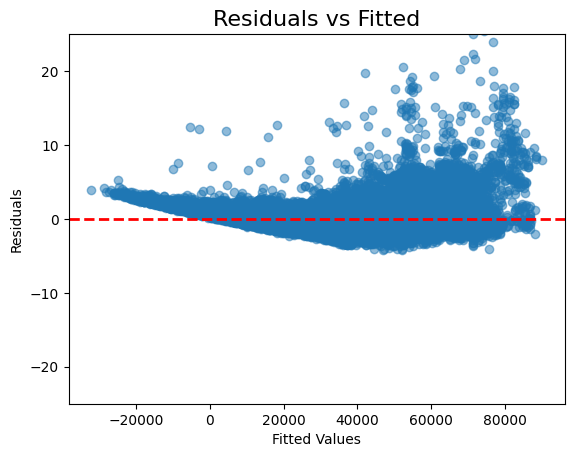

In [86]:
ax = sns.regplot(x=fitted_y, y=model.resid_pearson, fit_reg=False, scatter_kws={'alpha':0.5})
ax.set_title('Residuals vs Fitted', fontsize=16)
ax.set(xlabel='Fitted Values', ylabel='Residuals')
ax.axhline(y=0, color='r', linestyle='--', lw=2)
ax.set_ylim(-25, 25)

In [87]:
np.mean(deleted_studentized_residuals)

1.8132029976046617e-05

From the plot,  Moreover, there is a slight curvilinear relationship. So, the linear model may not be a good fit for the data. Moroeover, we observe a megaphone shaped pattern. Therefore, there may be some heteroscedasticity. To make sure, we will perform a statistical test for heteroscedasticity.

In [88]:
import scipy.stats as stats
fitted_y = model.fittedvalues
order_index = fitted_y.argsort()
sorted_residuals = model.resid[order_index]

# Create group for levene test
n = len(sorted_residuals)
k = 2
statistics, p_val = stats.levene(sorted_residuals[:n//k], sorted_residuals[n//k:], center='median')
print('statistic: ', statistics)

if p_val < 0.05:
    print('The variances are unequal, p-value: ', p_val)
else:
    print('The variances are homogeneous, p-value: ', p_val)


statistic:  16109.320822132671
The variances are unequal, p-value:  0.0


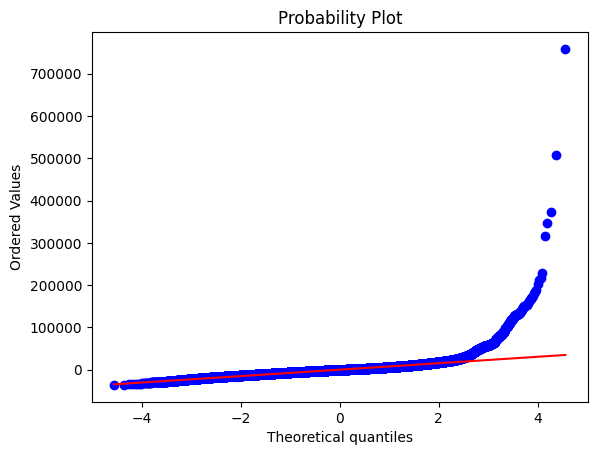

In [89]:
# create a q-q plot
import scipy.stats as stats
import pylab

stats.probplot(model.resid, dist="norm", plot=pylab)
pylab.show()

In [90]:
# check for normality of residuals
from scipy.stats import shapiro
stat, p = shapiro(model.resid)
print('Statistics=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

Statistics=0.805, p=0.000
Probably not Gaussian


c:\Users\apurb\.conda\envs\carprice\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


It is clear that there is heteroscedasticity. Moreover, the normality assumption is also violated.

## Box-cox transformation and model refit

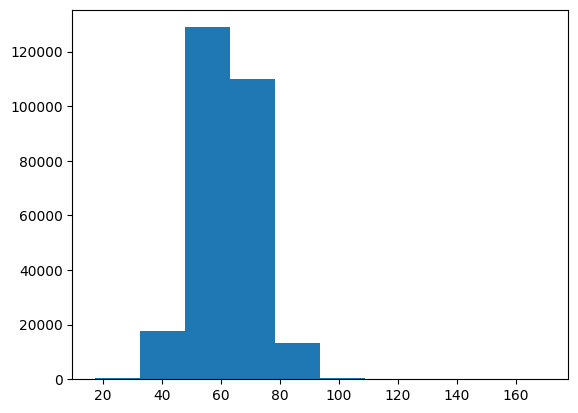

In [91]:
# perform box-cox transformation
from scipy.stats import boxcox

# transform training data & save lambda value
y_train_bc, lam = boxcox(y_train)

# plot transformed data
plt.hist(y_train_bc)
plt.show()

In [92]:
# train on transformed data
model = sm.OLS(y_train_bc, X_train_stat).fit()
y_pred = model.predict(X_val_stat)

# transform validation data
y_val_bc = boxcox(y_val, lam)

# evaluate model
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_val_bc, y_pred)
print('MAPE: ', mape)

accuracy = 100 - mape * 100
print('Accuracy: ', accuracy)

MAPE:  0.052932403232567204
Accuracy:  94.70675967674327


In [93]:
y_pred = model.predict(X_train_stat)

# evaluate model
mape = mean_absolute_percentage_error(y_train_bc, y_pred)
print('Train MAPE: ', mape)

accuracy = 100 - mape * 100
print('Train Accuracy: ', accuracy)

Train MAPE:  0.046829565731602
Train Accuracy:  95.3170434268398


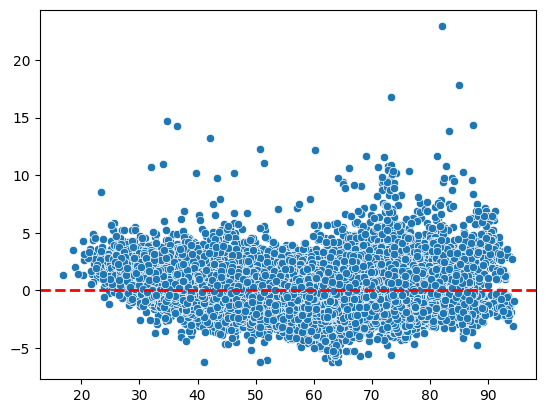

In [94]:
# Plot residual vs fitted values
studentized_residuals = model.get_influence().resid_studentized_internal
ax = sns.scatterplot(x=model.fittedvalues, y=studentized_residuals)
ax.axhline(y=0, color='r', linestyle='--', lw=2)

In [95]:
# Check for outliers
# Calculate the studentized deleted residuals
studentized_residuals = model.get_influence().resid_studentized_internal
r = studentized_residuals
n = len(r)
deleted_studentized_residuals = pd.Series([r_i * math.sqrt((n-2-1)/(n-2-r_i**2)) for r_i in r])
critical_value = stats.t.ppf(q=1-(.10/(2*n)), df=n-3-1)

# Identify the outliers
is_outlier = abs(deleted_studentized_residuals) > critical_value
outliers = deleted_studentized_residuals[abs(deleted_studentized_residuals) > critical_value].index
print(outliers)


Int64Index([  2011,   2362,   2801,   3277,   3532,   5444,   6272,   7633,
              7742,   8687,
            ...
            264585, 266599, 266876, 267754, 268085, 270248, 270514, 270746,
            271031, 271097],
           dtype='int64', length=283)


<AxesSubplot:>

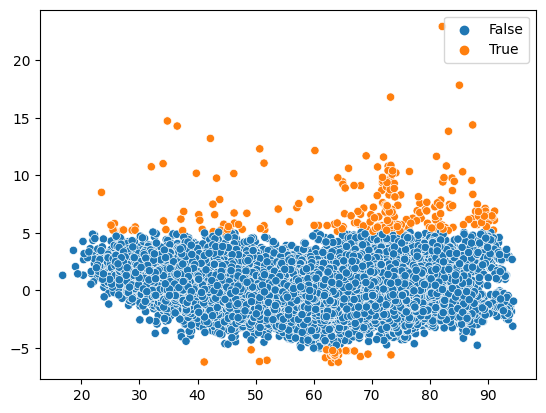

In [96]:
fitted_y = model.fittedvalues
sns.scatterplot(x=fitted_y, y=deleted_studentized_residuals, hue=is_outlier)

In [97]:
cook_distance, pvals = model.get_influence().cooks_distance
is_influential = pvals[outliers] > 0.5
influential_outliers = outliers[is_influential]
print(influential_outliers)

Int64Index([  2011,   2362,   2801,   3277,   3532,   5444,   6272,   7633,
              7742,   8687,
            ...
            264585, 266599, 266876, 267754, 268085, 270248, 270514, 270746,
            271031, 271097],
           dtype='int64', length=283)


<AxesSubplot:>

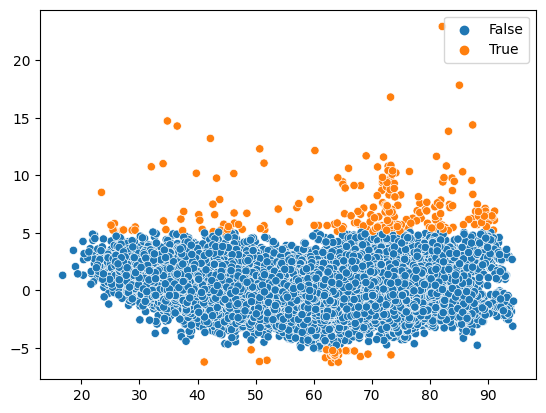

In [98]:
is_influential = pvals > 0.1
is_outlier_and_influential = is_outlier & is_influential
sns.scatterplot(x=fitted_y, y=deleted_studentized_residuals, hue=is_outlier_and_influential)

In [99]:
X_train_stat.head()

,const,back_legroom (in),body_type_suv,body_type_sedan,body_type_pickup truck,body_type_wagon,body_type_coupe,body_type_hatchback,body_type_minivan,body_type_van,...,wheel_system_awd,wheel_system_4wd,wheel_system_unknown,wheelbase (in),year,dealer_region_South,dealer_region_Northeast,dealer_region_Midwest,volume,combined_fuel_economy
0,1.0,32.9,1,0,0,0,0,0,0,0,...,0,0,0,109.8,2020,1,0,0,337.5,35.000000
1,1.0,34.5,0,1,0,0,0,0,0,0,...,0,0,0,109.3,2020,1,0,0,320.7,51.000000
2,1.0,35.2,0,1,0,0,0,0,0,0,...,0,0,0,112.2,2020,1,0,0,323.5,52.000000
3,1.0,35.2,0,1,0,0,0,0,0,0,...,0,0,0,112.2,2019,0,0,0,323.9,62.000000
4,1.0,38.0,1,0,0,0,0,0,0,0,...,1,0,0,103.9,2018,0,1,0,330.2,58.164986


In [100]:
y_train_bc = pd.Series(y_train_bc)
y_train_bc.head()

0    71.232948
1    70.040012
2    73.949397
3    67.955618
4    60.551045
dtype: float64

In [101]:
# Remove the outliers
X_train_stat = X_train_stat.drop(influential_outliers, axis=0)
y_train_bc = y_train_bc.drop(influential_outliers)
X_train_stat.reset_index(drop=True, inplace=True)
y_train_bc.reset_index(drop=True, inplace=True)

In [102]:
## Refit the model
model = sm.OLS(y_train_bc, X_train_stat).fit()
y_pred = model.predict(X_val_stat)

y_val_bc = boxcox(y_val, lam)

from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_val_bc, y_pred)
print('MAPE: ', mape)
accuracy = 100 - mape * 100
print('Accuracy: ', accuracy)

MAPE:  0.052631803345884576
Accuracy:  94.73681966541155


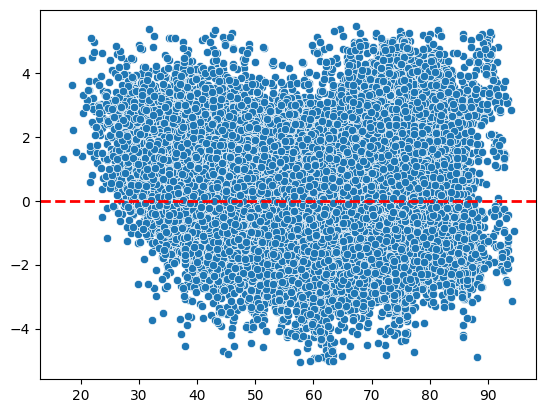

In [103]:
# Plot residual vs fitted values
studentized_residuals = model.get_influence().resid_studentized_internal
ax = sns.scatterplot(x=model.fittedvalues, y=studentized_residuals)
ax.axhline(y=0, color='r', linestyle='--', lw=2)

Now the data points are randomly scattered. So, the heteroscedasticity is removed.

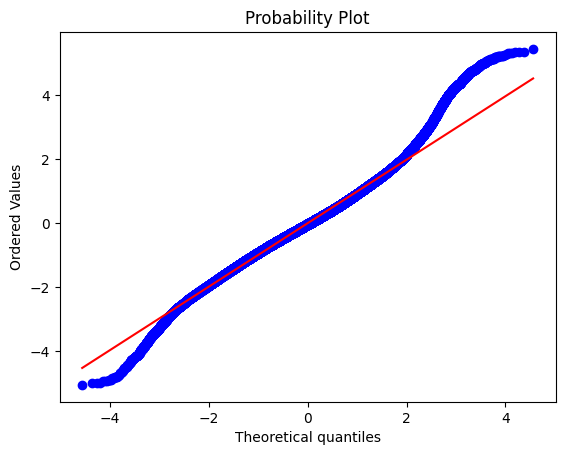

In [104]:
# check for normality of residuals
stats.probplot(studentized_residuals, dist="norm", plot=pylab)
pylab.show()

In [105]:
# check for normality of residuals
from scipy.stats import shapiro
stat, p = shapiro(model.resid)
print('Statistics=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

Statistics=0.987, p=0.000
Probably not Gaussian


c:\Users\apurb\.conda\envs\carprice\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


The normality assumption is still not satisfied. However, we are not going to make any inference here. Our goal is to predict the price of the used cars. So, we will proceed with the model.

## Multicollinearity check

In [106]:
train = pd.concat([X_train_stat, y_train_bc], axis=1)
corr = train.corr()

<AxesSubplot:>

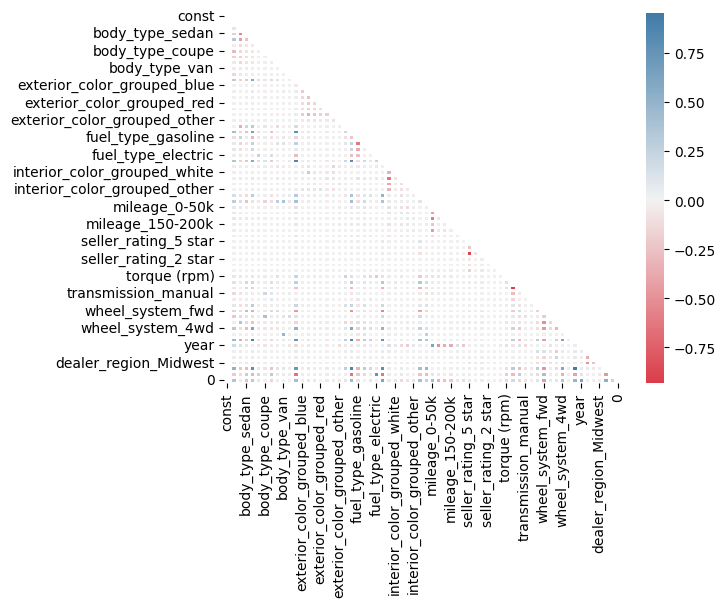

In [107]:
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(h_neg=10, h_pos=240, as_cmap=True)
sns.heatmap(corr, mask=mask,
            center=0, cmap=cmap, linewidths=1,
            annot=False, fmt=".2f")

In [108]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def find_vif(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                          for i in range(len(df.columns))]
    return vif_data
vif_xtrain = find_vif(X_train_stat)


c:\Users\apurb\.conda\envs\carprice\lib\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
c:\Users\apurb\.conda\envs\carprice\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [109]:
vif_xtrain[vif_xtrain['VIF'] > 10]

,feature,VIF
2,body_type_suv,inf
3,body_type_sedan,inf
4,body_type_pickup truck,inf
5,body_type_wagon,inf
6,body_type_coupe,inf
7,body_type_hatchback,inf
8,body_type_minivan,inf
9,body_type_van,inf
10,body_type_convertible,inf
12,exterior_color_grouped_blue,inf


Because of one-hot encoding, there is a perfect multicollinearity between the one-hot encoded variables of a featyre. So, we will drop one of the dummy variables from each categorical variable.

In [110]:
X_train_copy = X_train_stat.copy()

In [111]:
cols_to_drop = ['body_type_suv', 'exterior_color_grouped_white', 'interior_color_grouped_black', 'mileage_unknown', 'seller_rating_5 star',\
                'transmission_automatic', 'wheel_system_fwd']
X_train_copy.drop(cols_to_drop, axis=1, inplace=True)
vif_xtrain = find_vif(X_train_copy)

In [112]:
vif_xtrain[vif_xtrain['VIF'] > 10]

,feature,VIF
0,const,1.364176e+06
3,body_type_pickup truck,1.133933e+01
49,wheelbase (in),3.511249e+01
54,volume,2.839868e+01
55,combined_fuel_economy,1.185036e+01


We observe there is some multicollinearity. However, we will check how the model performs if we remove the multicollinear variables.

In [113]:
high_vif = vif_xtrain[vif_xtrain['VIF'] > 10].sort_values(by='VIF', ascending=False)

In [114]:
while len(high_vif) > 0:
    top_vif = high_vif.iloc[0]['feature']
    X_train_copy = X_train_copy.drop(top_vif, axis=1)
    vif_xtrain= find_vif(X_train_copy)
    high_vif = vif_xtrain[vif_xtrain['VIF'] > 10].sort_values(by='VIF', ascending=False)

In [115]:
vif_xtrain

,feature,VIF
0,body_type_sedan,1.838900
1,body_type_pickup truck,2.797023
2,body_type_wagon,1.124172
3,body_type_coupe,1.336536
4,body_type_hatchback,1.201747
5,body_type_minivan,1.136905
6,body_type_van,1.347809
7,body_type_convertible,1.051407
8,exterior_color_grouped_blue,1.462089
9,exterior_color_grouped_silver,1.672107


In [116]:
vif_xtrain.mean()

c:\Users\apurb\.conda\envs\carprice\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


VIF    1.798514
dtype: float64

In [117]:
cols_to_keep = vif_xtrain.loc[:, 'feature'].tolist()
cols_to_drop = X_train_stat.columns.difference(cols_to_keep)

In [118]:
X_val_copy = X_val_stat.drop(cols_to_drop, axis=1)
X_test_copy = X_test_stat.drop(cols_to_drop, axis=1)

In [119]:
print(X_train_copy.shape, X_val_copy.shape, X_test_copy.shape)

(270949, 43) (67809, 43) (84761, 43)


In [120]:
X_train_copy = sm.add_constant(X_train_copy, has_constant='add')
model = sm.OLS(y_train_bc, X_train_copy).fit()

y_pred = model.predict(sm.add_constant(X_val_copy, has_constant='add'))

y_val_bc = boxcox(y_val, lam)

from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_val_bc, y_pred)
print('MAPE: ', mape)
accuracy = 100 - mape * 100
print('Accuracy: ', accuracy)

MAPE:  0.11100606689108203
Accuracy:  88.8993933108918


In [121]:
y_pred = model.predict(sm.add_constant(X_test_copy, has_constant='add'))

y_test_bc = boxcox(y_test, lam)

from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test_bc, y_pred)
print('Test MAPE: ', mape)
accuracy = 100 - mape * 100
print('Test Accuracy: ', accuracy)

Test MAPE:  0.11119154845554871
Test Accuracy:  88.88084515444513


So, removing multicollinear variables does not improve the model performance. As we don't plan to make any inference and multicollinearity does not affect the prediction, we will proceed with all the variables. We will now train the final model.

In [122]:
final_model = sm.OLS(y_train_bc, X_train_stat).fit()

y_pred = final_model.predict(X_test_stat)

y_test_bc = boxcox(y_test, lam)

from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test_bc, y_pred)
print('MAPE: ', mape)
accuracy = 100 - mape * 100
print('Accuracy: ', accuracy)

MAPE:  0.0520541146575288
Accuracy:  94.79458853424713


## Serialize the model

In [123]:
pickle.dump(final_model, open('model.pkl', 'wb'))